In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import pickle
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard

Using TensorFlow backend.


In [4]:
df_bening = pd.read_csv('benign_traffic.csv')

In [5]:
scaler = StandardScaler()
df_bening = scaler.fit_transform(df_bening)

In [6]:
x_train, x_opt, x_test = np.split(df_bening, [int((1/3)*len(df_bening)), int((2/3)*len(df_bening))])

In [7]:
nb_epoch = 8
input_dim = x_train.shape[1]
learning_rate = 0.012

autoencoder = Sequential()
autoencoder.add(Dense(int(0.75 * input_dim), activation="tanh", input_dim=input_dim))
autoencoder.add(Dense(int(0.5 * input_dim), activation="tanh"))
autoencoder.add(Dense(int(0.33 * input_dim), activation="tanh"))
autoencoder.add(Dense(int(0.25 * input_dim), activation="tanh"))
autoencoder.add(Dense(int(0.33 * input_dim), activation="tanh"))
autoencoder.add(Dense(int(0.5 * input_dim), activation="tanh"))
autoencoder.add(Dense(int(0.75 * input_dim), activation="tanh"))
autoencoder.add(Dense(input_dim))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
autoencoder.compile(loss='mean_squared_error',
                    optimizer='sgd')

cp = ModelCheckpoint(filepath="autoencoder_traffic.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(x_train, x_train,
                    epochs=nb_epoch,
                    validation_data=(x_opt, x_opt),
                    verbose=1,
                    callbacks=[cp, tb]).history

Instructions for updating:
Use tf.cast instead.
Train on 13033 samples, validate on 13033 samples
Epoch 1/8
13033/13033 [==============================] - 1s 51us/step - loss: 1.4948 - val_loss: 0.6999
Epoch 2/8
13033/13033 [==============================] - 1s 43us/step - loss: 1.1817 - val_loss: 0.6512
Epoch 3/8
13033/13033 [==============================] - 1s 39us/step - loss: 0.9453 - val_loss: 0.6161
Epoch 4/8
13033/13033 [==============================] - 1s 43us/step - loss: 0.7917 - val_loss: 0.5929
Epoch 5/8
13033/13033 [==============================] - 1s 43us/step - loss: 0.7003 - val_loss: 0.5748
Epoch 6/8
13033/13033 [==============================] - 1s 42us/step - loss: 0.6455 - val_loss: 0.5588
Epoch 7/8
13033/13033 [==============================] - 1s 45us/step - loss: 0.6110 - val_loss: 0.5461
Epoch 8/8
13033/13033 [==============================] - 1s 40us/step - loss: 0.5875 - val_loss: 0.5345


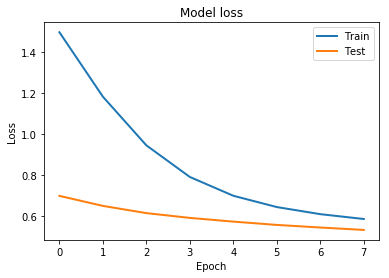

In [9]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [10]:
x_opt_predictions = autoencoder.predict(x_opt)

In [11]:
mse = np.mean(np.power(x_opt - x_opt_predictions, 2), axis=1)

In [12]:
tr = mse.mean() + mse.std()
tr

4.641004725519613